INTRODUÇÃO: O objetivo desta análise é apenas para estudo, na análise contém uma base de dados, contendo os seguintes conteúdos, o salario de cada cargo, local da empresa, o ano e o tipo de trabalho. Bora pro problema!

Uma empresa responsável por controlar as ações de outras empresas,começou a enfrentar um problema sério uma quantidade crescente de funcionários estava parando de trabalhar sem explicação aparente. Então decidiu procurar ajuda externa para uma análise específica e crucial, ela veio até nós e pediu para encontrarmos o motivo dessa queda sem explicação.Ela nos forneceu esse base de dados, para analisar, encontrar o problema e encontrar uma possível solução.

1. IMPORTANDO AS BIBLIOTECAS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
import seaborn as sns
import matplotlib.dates as mdates
from plotly.subplots import make_subplots
import matplotlib.ticker as mtick
import generalização

IMPORTANDO ARQUIVO

In [2]:
salario_df = pd.read_csv(r'C:\Users\Gabriel\OneDrive\Documentos\Portfolio_1\projeto_salario_data_scient\ds_salaries.csv')

In [3]:
salario_df

,id,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


2. PRÉ-PROCESSAMENTO DOS DADOS

2.1 quantidade de colunas e linhas do base de dados

In [4]:
print(f'Quantidade de coluna {salario_df.shape[1]}')
print(f'Quantidade de linhas {salario_df.shape[0]}')

Quantidade de coluna 12
Quantidade de linhas 607


2.2 informações das colunas

In [5]:
salario_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


2.3 Código para saber se existe linhas vazias ou não.

In [6]:
salario_df.isnull().sum()

id                    0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

2.4 colunas existente no meu base de dados

In [7]:
print(salario_df.columns)
print(f' Existem {salario_df.shape[1]} colunas ')

Index(['id', 'work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')
 Existem 12 colunas 


In [ ]:
salario_df.\
    select_dtypes(object).\
        describe().\
            transpose()

,count,unique,top,freq
experience_level,607,4,SE,280
employment_type,607,4,FT,588
job_title,607,50,Data Scientist,143
salary_currency,607,17,USD,398
employee_residence,607,57,US,332
company_location,607,50,US,355
company_size,607,3,M,326


3 TRATAMENTO DOS DADOS

3.1 Após uma breve analisar, iremos excluir colunas desnecessária para a nossa a análise nas quais repetem os mesmo valores, ou valores que não serão útil.

In [9]:
salario_df.drop(columns=['id','employee_residence','salary_in_usd'], axis=1 ,inplace=True)

In [10]:
salario_df.head(4)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,0,HN,S


3.2 Renomeando as colunas

In [11]:
salario_df.rename(columns={
    'work_year':'data_trabalho','experience_level':'nivel_experiencia',
    'employment_type':'tipo_emprego','job_title':'cargo','salary':'salario',
    'salary':'salario','salary_currency':'moeda_salario','remote_ratio':'relaçao_remota',
    'company_location':'localidade_empresa'
}, inplace=True)

In [ ]:
salario_df.head(5)

,data_trabalho,nivel_experiencia,tipo_emprego,cargo,salario,moeda_salario,relaçao_remota,localidade_empresa,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,50,US,L


In [13]:
for  i in salario_df[['nivel_experiencia','tipo_emprego','moeda_salario','cargo']]:
    salario_df[i] = salario_df[i].apply(lambda x: x.upper())


In [14]:
for coluna in [
    'moeda_salario',
    'localidade_empresa',
    'nivel_experiencia',
    'tipo_emprego'
    ]:
    print(f'Valores único de: {coluna} {salario_df[coluna].unique()}\n')

Valores único de: moeda_salario ['EUR' 'USD' 'GBP' 'HUF' 'INR' 'JPY' 'CNY' 'MXN' 'CAD' 'DKK' 'PLN' 'SGD'
 'CLP' 'BRL' 'TRY' 'AUD' 'CHF']

Valores único de: localidade_empresa ['DE' 'JP' 'GB' 'HN' 'US' 'HU' 'NZ' 'FR' 'IN' 'PK' 'CN' 'GR' 'AE' 'NL'
 'MX' 'CA' 'AT' 'NG' 'ES' 'PT' 'DK' 'IT' 'HR' 'LU' 'PL' 'SG' 'RO' 'IQ'
 'BR' 'BE' 'UA' 'IL' 'RU' 'MT' 'CL' 'IR' 'CO' 'MD' 'KE' 'SI' 'CH' 'VN'
 'AS' 'TR' 'CZ' 'DZ' 'EE' 'MY' 'AU' 'IE']

Valores único de: nivel_experiencia ['MI' 'SE' 'EN' 'EX']

Valores único de: tipo_emprego ['FT' 'CT' 'PT' 'FL']



In [15]:
cor_parametro = '#004225'
cor_de_fundo = '#BDB395'
cor_das_barra = '#F5F5DC'

4. ANALISE EXPLORATÓRIA e VISUALIZAÇÃO GRAFICA.


Qual é a média de salário dentre os analista de dados? E como varia o salário ?

In [16]:
#calculando a média de salário por experiência dentre os analistas de dados.

salario_analista = salario_df.loc[salario_df['cargo'] == 'DATA ANALYST']
media_salario_por_experiencia = salario_analista.groupby(['nivel_experiencia'])['salario'].mean().round().reset_index()
media_salario_por_experiencia

,nivel_experiencia,salario
0,EN,90063.0
1,EX,120000.0
2,MI,68887.0
3,SE,112078.0


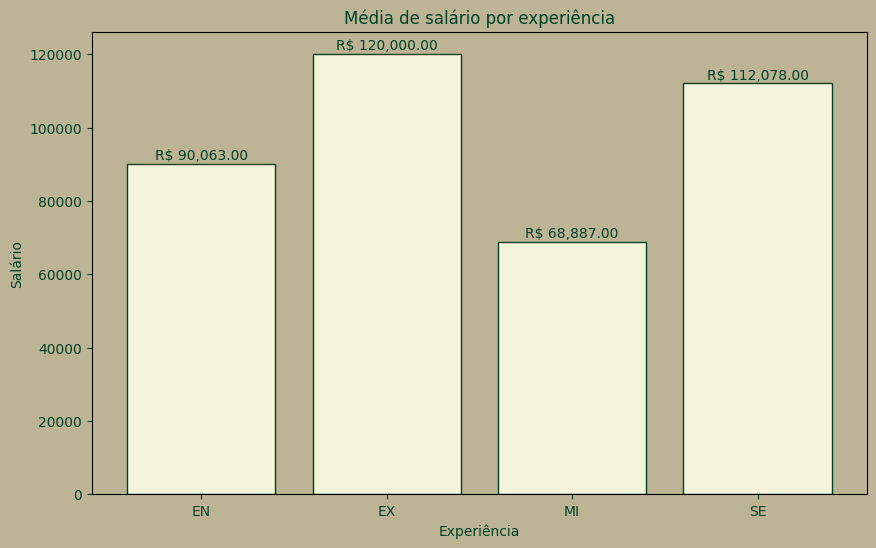

In [17]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(media_salario_por_experiencia['nivel_experiencia'], media_salario_por_experiencia['salario'], color=cor_das_barra)
ax.set_title('Média de salário por experiência', color=cor_parametro)
ax.set_xlabel('Experiência',color=cor_parametro)
ax.set_ylabel('Salário', color=cor_parametro)
ax.tick_params(colors=cor_parametro)
fig.patch.set_facecolor(color=cor_de_fundo)
ax.set_facecolor(color=cor_de_fundo)


for p in ax.patches:
    ax.annotate(f'R$ {p.get_height():,.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 6), 
                textcoords='offset points', color=cor_parametro)
    
for patch in ax.patches:
    patch.set_edgecolor(cor_parametro)

plt.show()

In [18]:
#calculo para saber de como varia o salário dentre os analistas
variancia_salario = salario_analista.groupby(['nivel_experiencia'])['salario'].std().round().reset_index()

print(variancia_salario)



  nivel_experiencia   salario
0                EN  116423.0
1                EX   14142.0
2                MI   39664.0
3                SE   30990.0


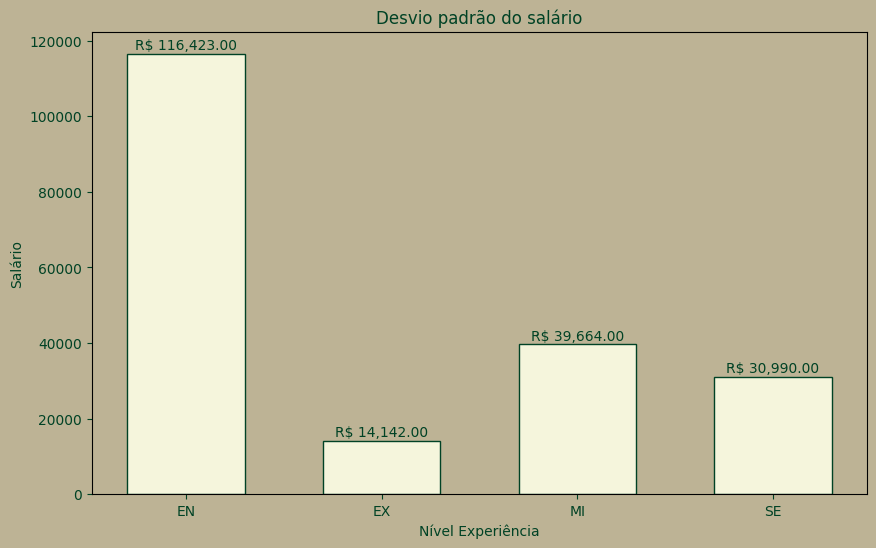

In [19]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(variancia_salario['nivel_experiencia'], variancia_salario['salario'], color=cor_das_barra, width=0.6)
ax.set_title('Desvio padrão do salário', color=cor_parametro)
ax.set_xlabel('Nível Experiência', color=cor_parametro)
ax.set_ylabel('Salário', color=cor_parametro)
ax.tick_params(colors=cor_parametro)
fig.patch.set_facecolor(color=cor_de_fundo)
ax.set_facecolor(color=cor_de_fundo)

for p in ax.patches:
    ax.annotate(f'R$ {p.get_height():,.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 6), 
                textcoords='offset points', color=cor_parametro)

for patch in ax.patches:
    patch.set_edgecolor(cor_parametro)

plt.show()

Qual é a moeda mais valorizada dentre os salários?

In [20]:
moedas = salario_df.groupby(['moeda_salario'])['salario'].sum().reset_index()
moedas_mais_bem_paga = moedas.sort_values(by='salario', ascending=False)
moedas_mais_bem_paga

,moeda_salario,salario
10,INR,55734997
16,USD,54631386
4,CLP,30400000
9,HUF,22000000
11,JPY,19950000
7,EUR,5441699
8,GBP,2712856
2,CAD,2214500
12,MXN,778000
5,CNY,539000


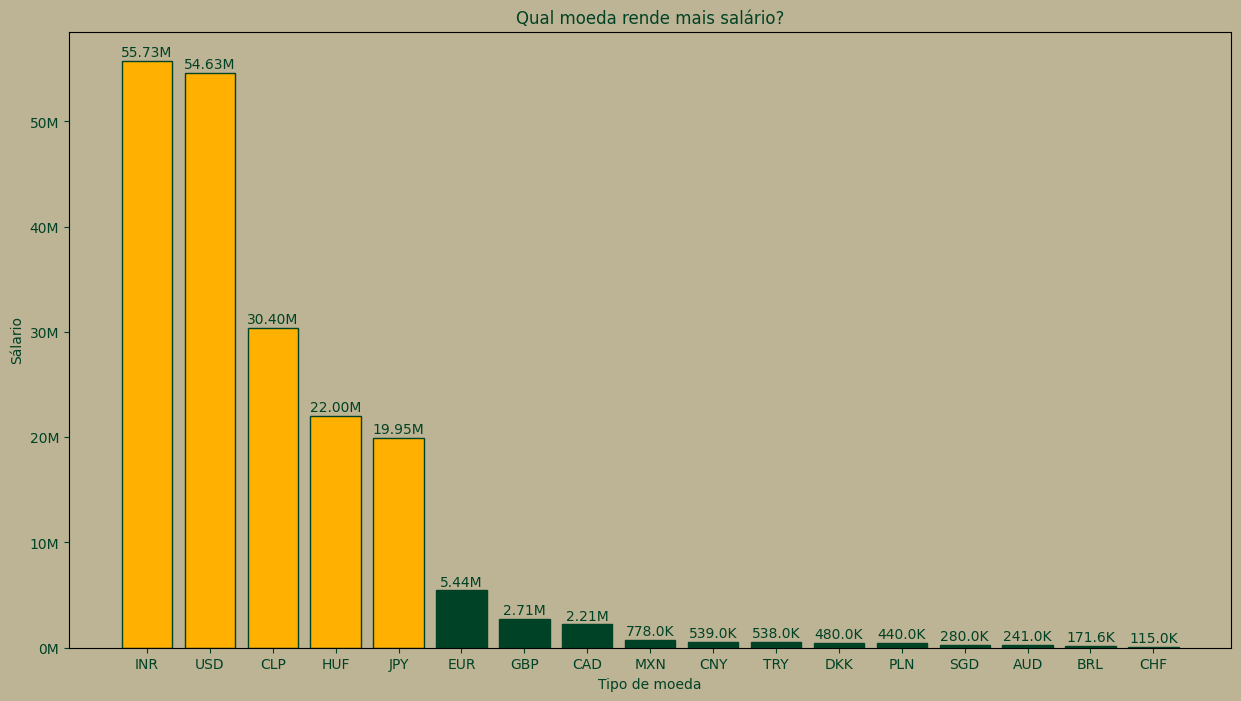

In [21]:
#dashboard que mostra qual é a moeda que mais bem paga entre os cargos que estão no base de dados.
cores = []
for numeros in moedas_mais_bem_paga['salario'].sort_values( ascending=True):
        if numeros >= 480000:
                cores.append('#004225')
        else:
                cores.append('#FFB000')

fig , ax = plt.subplots(figsize=(15,8))
ax.bar(moedas_mais_bem_paga['moeda_salario'], moedas_mais_bem_paga['salario'] , color=cores)
ax.set_title('Qual moeda rende mais salário?', color=cor_parametro)
ax.set_xlabel('Tipo de moeda', color=cor_parametro)
ax.set_ylabel('Sálario', color=cor_parametro)
ax.tick_params(colors=cor_parametro)
fig.patch.set_facecolor(cor_de_fundo)
ax.set_facecolor(cor_de_fundo)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x / 1_000_000:.0f}M'))

for p in ax.patches:
        valor = p.get_height()
        if valor >= 1_000_000:
                label = f'{p.get_height() / 1_000_000:,.2f}M'
        else:
               label = f'{p.get_height()/ 1_000}K'
        ax.annotate(label,(p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 6), textcoords='offset points', 
                    color=cor_parametro)    

for patch in ax.patches:
    patch.set_edgecolor(cor_parametro)

plt.show()

Por que a moeda INR é mais bem paga dentre os salário?  

Para ter esta resposta vamos destrinchar alguns fato, vamos comparar a primeira moeda mais bem paga com a segunda.


In [22]:
#aqui podemos ver que a experiencia mais foi paga é a MI(Mixed Experience)
salario_df.groupby(['nivel_experiencia'])['salario'].sum()

nivel_experiencia
EN     23286776
EX     11103875
MI    102371568
SE     59905819
Name: salario, dtype: int64

Com esta linha de código filtrando somente os dados que são pago na moeda INR, podemos ver que eles tem menos gente contratada.
Comparado com a segunda moeda USD. Mas isso só gera uma dúvida, 
ja que eles tem menos gente contratada do que as empresas que paga com a USD e o nivel de experiencia SE(Senior Experience)
é a segunda maior média de salário, então por que eles ainda assim são a mais bem paga?

R= Bom, a resposta que eu encontrei é a falta de demanda de mão de obra como as empresas que pagam com a moeda USD tem uma concentração maior de funcionário. 

INR paga muito bem no nível SE (Sênior), com 20,7M, mas também há uma distribuição considerável nos outros níveis (MI, EX), especialmente em MI, que também contribui bastante (15,64M).

USD, por outro lado, também paga bem no nível SE (34,88M), mas a distribuição nos outros níveis, especialmente no EN (Entry-level) e EX (Executive), é muito maior comparado ao INR, especialmente no EN (3,73M em USD vs 13,39M em INR). Ou seja, USD tem mais gente começando ou com experiência intermediária, o que puxa a média salarial pra baixo.

In [23]:
moeda_inr = salario_df.loc[salario_df['moeda_salario'] == 'INR']
moeda_inr_salario = moeda_inr.groupby(['nivel_experiencia'])['salario'].sum().reset_index()
print(moeda_inr_salario)
moeda_inr['nivel_experiencia'].value_counts()

  nivel_experiencia   salario
0                EN  13393000
1                EX   6000000
2                MI  15642000
3                SE  20699997


nivel_experiencia
MI    11
EN    10
SE     5
EX     1
Name: count, dtype: int64

In [24]:
moeda_usd = salario_df[salario_df['moeda_salario'] == 'USD']
print(moeda_usd.groupby(['nivel_experiencia'])['salario'].sum())
moeda_usd['nivel_experiencia'].value_counts()

nivel_experiencia
EN     3731016
EX     4214875
MI    11805293
SE    34880202
Name: salario, dtype: int64


nivel_experiencia
SE    233
MI     99
EN     48
EX     18
Name: count, dtype: int64

Quais são os cargos mais bem pagos?

In [25]:
#agrupando os cargos mais bem pagos
cargo_mais_bem_pago = salario_df.groupby(['cargo'])[['salario']].sum().\
    reset_index()
cargo_mais_bem_pago_10 = cargo_mais_bem_pago.sort_values(by='salario',ascending=False).\
    reset_index(drop=True).head(10)
cargo_mais_bem_pago_10

,cargo,salario
0,DATA SCIENTIST,72693650
1,DATA ENGINEER,23655793
2,ML ENGINEER,16060000
3,DATA SCIENCE MANAGER,12751183
4,BI DATA ANALYST,11412272
5,MACHINE LEARNING ENGINEER,11181433
6,DATA ANALYST,9370681
7,HEAD OF MACHINE LEARNING,6000000
8,BIG DATA ENGINEER,3640000
9,LEAD DATA SCIENTIST,3305000


In [26]:
'''dashboard para visualizar quais o cargo mais bem pago. 
OBS: Este gráfico está em funil e a única biblioteca que eu tenho conhecimento que possui
este modelo de grafico pronto é o Plotly porém, por algumas limitações talvez vocês não conseguiram visualizar o gráfico direto pelo github. Me desculpem!'''

cores = ['#a67c00','#bf9b30','#ffbf00','#ffcf40','#ffdc73','#ffdc73','#ffdc73','#ffdc73','#ffdc73','#ffdc73']

fig = go.Figure(layout=go.Layout(width=1000, height=600))
fig.add_trace(
    go.Funnel(
        x=cargo_mais_bem_pago_10['salario'], y=cargo_mais_bem_pago_10['cargo'],
        textinfo= "value+percent initial",
        textfont_size=12,
        textangle=0,
        textposition='inside',
        cliponaxis=False,
        marker=dict(color=cores)
    )
)

fig.update_layout(
    title='Dashboard Funil dos cargos mais bem pagos',
    xaxis_title = 'SALARIO',
    paper_bgcolor=cor_de_fundo,
    plot_bgcolor=cor_de_fundo,
    font=dict(color=cor_parametro)
)
pyo.init_notebook_mode(connected=True)
pyo.iplot(fig)

In [27]:
#criando uma nova coluna, para categorizar a coluna relação_remota esaber quais sao o tipo de modelo de trabalho, 
# 0 presencial, 50 hibrida, 100 home office.

nova_lista = []

for valores in salario_df['relaçao_remota']:
    if valores == 0:
        nova_lista.append('Presencial')
    elif valores == 50:
        nova_lista.append('Hibrido')
    elif valores == 100:
        nova_lista.append("Home office")

salario_df['modelo_trabalho'] = nova_lista


Quantidade de pessoas para cada modalidade de trabalho?


In [28]:
quantidade_relaçao_remota = salario_df.groupby(['modelo_trabalho'])['nivel_experiencia'].count().reset_index().sort_values(by='nivel_experiencia', ascending=False)
quantidade_relaçao_remota

,modelo_trabalho,nivel_experiencia
1,Home office,381
2,Presencial,127
0,Hibrido,99


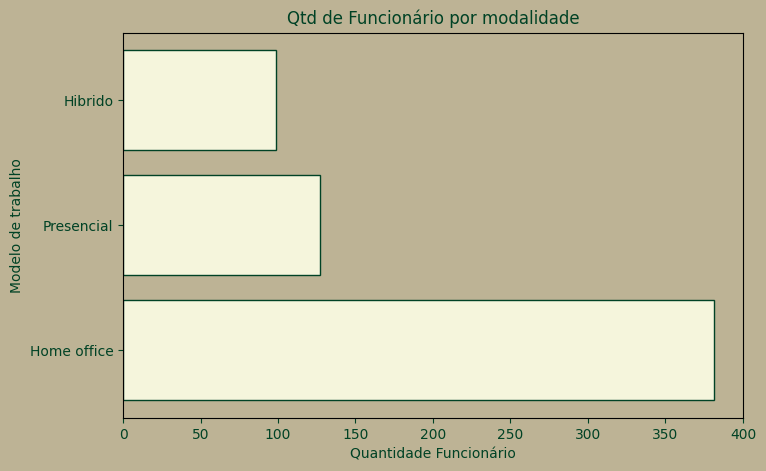

In [29]:
fig, ax = plt.subplots(figsize=(8,5))
plt.barh(quantidade_relaçao_remota['modelo_trabalho'], quantidade_relaçao_remota['nivel_experiencia'], color=cor_das_barra)
ax.set_title('Qtd de Funcionário por modalidade', color=cor_parametro)
ax.set_xlabel('Quantidade Funcionário', color=cor_parametro)
ax.set_ylabel('Modelo de trabalho', color=cor_parametro)
ax.tick_params(colors=cor_parametro)
fig.patch.set_facecolor(cor_de_fundo)
ax.set_facecolor(cor_de_fundo)
for patch in ax.patches:
    patch.set_edgecolor(cor_parametro)
plt.show()

#gráfico com a biblioteca plotly, como explicado a cima talvez vocês não veja.
fig = go.Figure(layout=go.Layout(width=500,height=400))
fig.add_trace(go.Scatter(x=quantidade_relaçao_remota['modelo_trabalho'],
                        y=quantidade_relaçao_remota['nivel_experiencia'],
                        mode='markers',
                        marker=dict(size=[30, 40, 60],color=['#c152ea ', '#ea52c7', '#7552ea'])
            ))
fig.update_layout(
    title='Quantidade de pessoas com relação remota',
    xaxis_title='MODELO DE TRABALHO',
    yaxis_title = 'Quantidade de pessoas',
    plot_bgcolor='#2d3142',
    paper_bgcolor='#2d3142',
    font=dict(color='white')
)

pyo.init_notebook_mode(connected=True)
pyo.iplot(fig)

Qual é o modelo de trabalho que tem o maior faturamento?

In [30]:
salario_por_modalidade = salario_df.groupby(['modelo_trabalho'])[['salario']].sum().reset_index()
salario_por_modalidade.reset_index(drop=True).sort_values(by='salario',ascending=False)


,modelo_trabalho,salario
1,Home office,98869463
0,Hibrido,70093799
2,Presencial,27704776


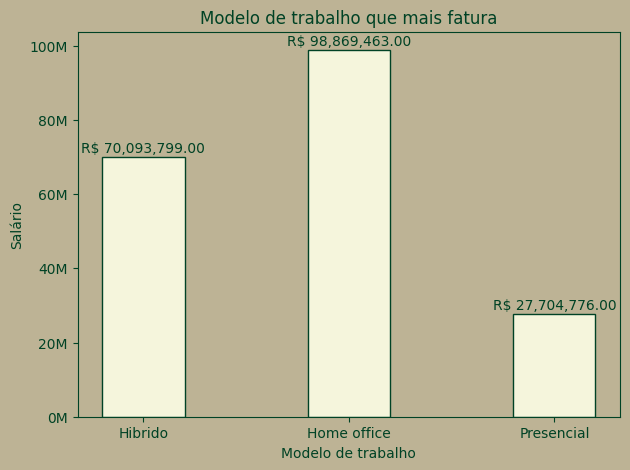

In [31]:
fig, ax = plt.subplots(figsize=(7,5))
plt.bar(salario_por_modalidade['modelo_trabalho'], salario_por_modalidade['salario'], width=0.4,color=cor_das_barra)
ax.set_title('Modelo de trabalho que mais fatura', color=cor_parametro)
ax.set_xlabel('Modelo de trabalho', color=cor_parametro)
ax.set_ylabel('Salário', color=cor_parametro)
ax.tick_params(colors=cor_parametro)
fig.patch.set_facecolor(color=cor_de_fundo)
ax.set_facecolor(color=cor_de_fundo)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x / 1_000_000:.0f}M'))


for patch in ax.patches:
    patch.set_edgecolor(color=cor_parametro)

for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color(cor_parametro)

for p in ax.patches:
    ax.annotate(f'R$ {p.get_height():,.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 6), 
                textcoords='offset points', color=cor_parametro)
plt.show()

In [ ]:
#fazendo separação dos meus anos e calculando a soma de salario pra cada data.
print(salario_df['data_trabalho'].unique())
data_2020 = salario_df.loc[salario_df['data_trabalho'] == 2020]
data_2021 = salario_df.loc[salario_df['data_trabalho'] == 2021]
data_2022 = salario_df.loc[salario_df['data_trabalho'] == 2022]

[2020 2021 2022]


In [33]:
salario_2020 = data_2020['salario'].sum()
salario_2021 = data_2021['salario'].sum()
salario_2022 = data_2022['salario'].sum()
print(f"salarios \nsalario de 2020 R${salario_2020}\nsalario de 2021 R${salario_2021}\nsalario de 2022 R${salario_2022}")

salarios 
salario de 2020 R$27531809
salario de 2021 R$118628993
salario de 2022 R$50507236


#agrupando a quantidade de salario pra cada modelo de cada ano, por exemplo o ano de 2020 qual foi o modelo de trabalho que mais ganhou.


In [34]:
listas_de_anos = [data_2020,data_2021,data_2022]
for data in listas_de_anos:
    print(f'Modelo de trabalho do ano de {data['data_trabalho'].unique()} {data.groupby('modelo_trabalho')['salario'].sum().sort_values(ascending=False)}')


Modelo de trabalho do ano de [2020] modelo_trabalho
Hibrido        13193500
Home office     8609109
Presencial      5729200
Name: salario, dtype: int64
Modelo de trabalho do ano de [2021] modelo_trabalho
Home office    55706169
Hibrido        49515299
Presencial     13407525
Name: salario, dtype: int64
Modelo de trabalho do ano de [2022] modelo_trabalho
Home office    34554185
Presencial      8568051
Hibrido         7385000
Name: salario, dtype: int64


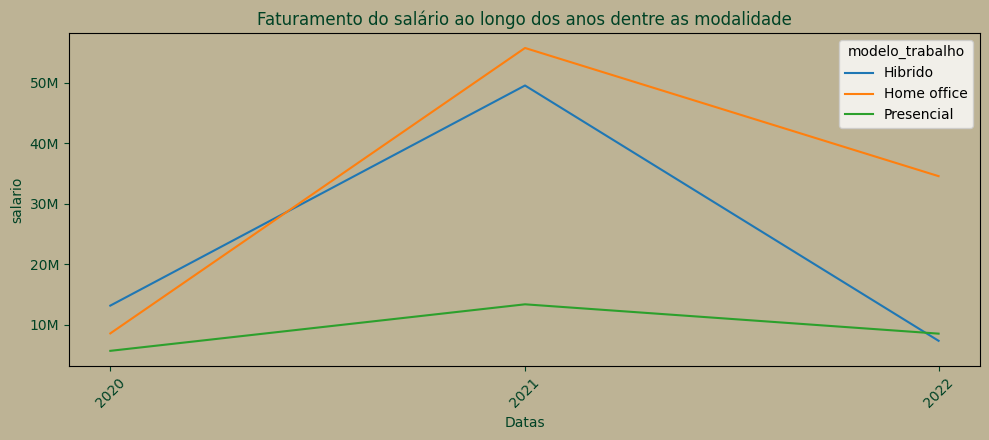

In [35]:
salario_anual = salario_df.groupby(['data_trabalho','modelo_trabalho'])['salario'].sum().reset_index()
salario_anual.sort_values(by='salario', ascending=False)
salario_anual['data_trabalho'] = pd.to_datetime(salario_anual['data_trabalho'].astype(str), format='%Y')


fig, ax = plt.subplots(figsize=(10,4.5))
sns.lineplot(x=salario_anual['data_trabalho'], y=salario_anual['salario'], hue=salario_anual['modelo_trabalho'], linewidth=1.5)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x / 1_000_000:.0f}M'))
fig.patch.set_facecolor(cor_de_fundo)
ax.set_title('Faturamento do salário ao longo dos anos dentre as modalidade', color=cor_parametro)
ax.set_xlabel('Datas', color=cor_parametro)
ax.set_ylabel('salario', color=cor_parametro)
ax.set_facecolor(cor_de_fundo)
ax.tick_params(colors=cor_parametro)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#o código abaixo é um laço de repetição aonde faz uma busca pela quantidade de pessoas que trabalhou como home office, hibrido e presencial para cada ano.

Relação remota do ano de [2020] modelo_trabalho
Home office    36
Hibrido        21
Presencial     15
Name: count, dtype: int64
Relação remota do ano de [2021] modelo_trabalho
Home office    117
Hibrido         66
Presencial      34
Name: count, dtype: int64
Relação remota do ano de [2022] modelo_trabalho
Home office    228
Presencial      78
Hibrido         12
Name: count, dtype: int64


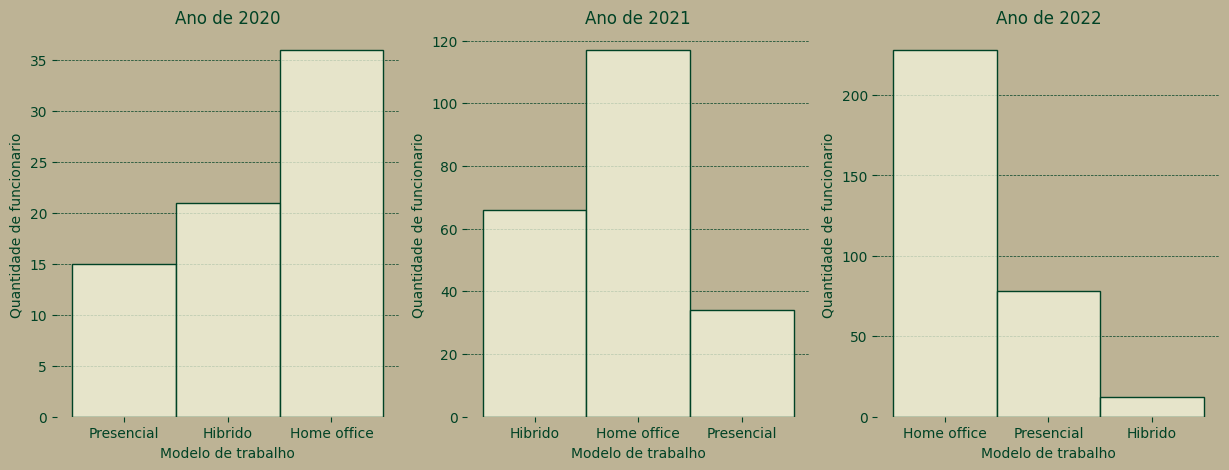

In [36]:
fig , ax = plt.subplots(1,3,figsize=(15,5))

for indice, grafico in enumerate(listas_de_anos):

    sns.histplot(grafico['modelo_trabalho'], color=cor_das_barra, ax=ax[indice])
    ax[indice].set_title(f'Ano de {str(grafico["data_trabalho"].unique()).strip('[]')}', color=cor_parametro)
    ax[indice].set_xlabel('Modelo de trabalho', color=cor_parametro)
    ax[indice].set_ylabel('Quantidade de funcionario', color=cor_parametro)
    fig.patch.set_facecolor(cor_de_fundo)
    ax[indice].set_facecolor(cor_de_fundo)
    ax[indice].tick_params(colors=cor_parametro)
    ax[indice].grid(axis='y', color=cor_parametro, linestyle='--', linewidth=0.5)
    
    for patch in ax[indice].patches:
        patch.set_edgecolor(cor_parametro)
        patch.set_zorder(15)

    for spin in ax[indice].spines.values():
        spin.set_visible(False)
        spin.set_facecolor(cor_parametro)

#gráfico em plotly
for valores in listas_de_anos:
    fig = go.Figure(layout=go.Layout(width=500, height=500))
    fig.add_trace(go.Histogram(histfunc='count', x=valores['modelo_trabalho'], marker_color='#bcd4e6'))
    fig.update_layout(title=f'relação remota do de {valores['data_trabalho'].unique()}',
                      xaxis_title='modelo de trabalho',
                      yaxis_title='quantidade',
                      paper_bgcolor='#2d3142',
                      plot_bgcolor='#2d3142',
                      font=dict(color='white'))
    pyo.init_notebook_mode(connected=True)
    pyo.iplot(fig)

for relacao in listas_de_anos:
    variavel_relacao = relacao.groupby('modelo_trabalho')['modelo_trabalho'].\
        value_counts().sort_values(ascending=False)
    print(f'Relação remota do ano de {relacao['data_trabalho'].unique()} {variavel_relacao}')

Qual é a propoção de funcionário pra cada ano?

In [37]:
for datas in listas_de_anos:
    print(f"Cerca de {np.sum(datas['modelo_trabalho'].value_counts()) / salario_df.shape[0] * 100:.2f}% dos funcionários trabalhava em {str(datas['data_trabalho'].unique()).strip('[]')}")

Cerca de 11.86% dos funcionários trabalhava em 2020
Cerca de 35.75% dos funcionários trabalhava em 2021
Cerca de 52.39% dos funcionários trabalhava em 2022


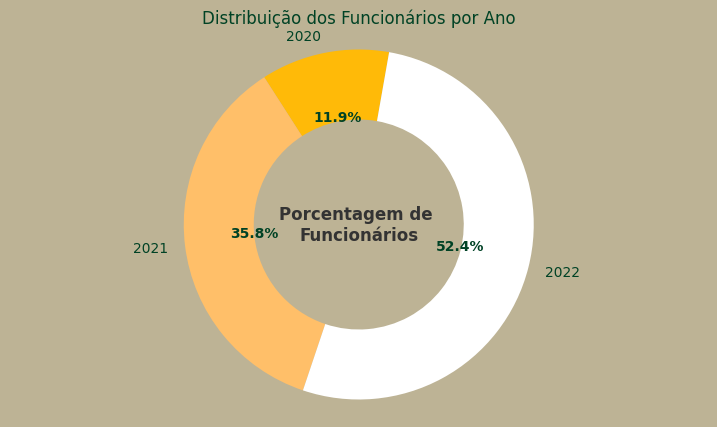

In [38]:
labels = ['2020', '2021', '2022']
sizes = [11.86, 35.75, 52.39]
colors = ['#ffba08', '#ffbf69', '#ffffff']


fig, ax = plt.subplots(figsize=(9,5))
wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%',
                                  startangle=80, colors=colors,
                                  wedgeprops=dict(width=0.4))


for text in texts:
    text.set_color(cor_parametro)



for autotext in autotexts:
    autotext.set_color(cor_parametro)
    autotext.set_fontsize(10)
    autotext.set_weight('bold')
    autotext.set_horizontalalignment('center')
    autotext.set_verticalalignment('baseline')
    


ax.text(0, 0, 'Porcentagem de \nFuncionários', ha='center', va='center', fontsize=12, weight='bold', color='#333')

fig.patch.set_facecolor(cor_de_fundo)
ax.axis('equal')  
plt.title('Distribuição dos Funcionários por Ano',color=cor_parametro)
plt.show()


In [39]:
qtd_funcionarios = salario_df.groupby('nivel_experiencia')[['nivel_experiencia']].value_counts().reset_index()
qtd_funcionarios

,nivel_experiencia,count
0,EN,88
1,EX,26
2,MI,213
3,SE,280


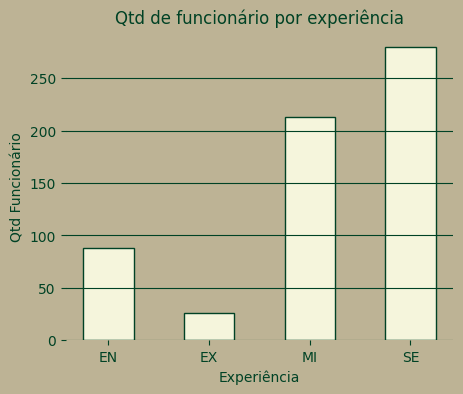

In [40]:
fig , ax = plt.subplots(figsize=(5,4))
ax.bar(qtd_funcionarios['nivel_experiencia'], qtd_funcionarios['count'], width=0.5, color=cor_das_barra)
ax.set_title('Qtd de funcionário por experiência',color=cor_parametro)
ax.set_xlabel('Experiência', color=cor_parametro)
ax.set_ylabel('Qtd Funcionário', color=cor_parametro)
fig.patch.set_facecolor(cor_de_fundo)
ax.set_facecolor(cor_de_fundo)
ax.tick_params(colors=cor_parametro)
ax.grid(axis='y', color=cor_parametro)

for patch in ax.patches:
    patch.set_edgecolor(cor_parametro)

for spine in ax.spines.values():
    spine.set_visible(False)

plt.show()

#análise para saber qual é a localidade da empresa que possui mais funcionarios buscando apenas 8 empresas que mais possui funcionário.



In [41]:
agrupamento_funcionario = salario_df.groupby(['localidade_empresa'])['nivel_experiencia'].count().reset_index()
qtd_funcionario_emp = agrupamento_funcionario.loc[agrupamento_funcionario['nivel_experiencia'] > 2].sort_values(by='nivel_experiencia',ascending=False).head(8)

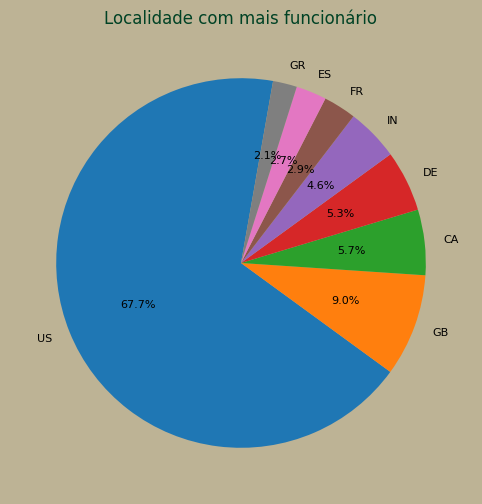

In [42]:
fig , ax = plt.subplots(figsize=(10,6))
ax.pie(qtd_funcionario_emp['nivel_experiencia'], labels=qtd_funcionario_emp['localidade_empresa'],
       autopct='%1.1f%%', 
       startangle=80,
       textprops={'fontsize':8});

ax.set_title('Localidade com mais funcionário', color=cor_parametro)
fig.patch.set_facecolor(cor_de_fundo)
plt.show()

In [43]:
#Este código possui 4 listas que serão adicionados valores do salário de cada tipo de emprego por ano.
backup_anos = list(salario_df['data_trabalho'].unique())
CT_dados = []
FL_dados = []
FT_dados = []
PT_dados = []

#loop passando cada ano presente no dataset, adicionando o salário total para cada tipo de emprego
for valor in listas_de_anos:
    agrupamento_emprego = valor.groupby(['data_trabalho','tipo_emprego'])['salario'].sum().reset_index()
    FT_dados.append(agrupamento_emprego.iloc[2,2])
    CT_dados.append(agrupamento_emprego.iloc[2,2])
    FL_dados.append(agrupamento_emprego.iloc[1,2])
    PT_dados.append(agrupamento_emprego.iloc[3,2])
    print(agrupamento_emprego)

   data_trabalho tipo_emprego   salario
0           2020           CT    100000
1           2020           FL     60000
2           2020           FT  27338809
3           2020           PT     33000
   data_trabalho tipo_emprego    salario
0           2021           CT     791000
1           2021           FL      32000
2           2021           FT  117134233
3           2021           PT     671760
   data_trabalho tipo_emprego   salario
0           2022           CT     29000
1           2022           FL    100000
2           2022           FT  50228236
3           2022           PT    150000


In [44]:
#Dashboard mostrando o salario para cada tipo de emprego em cada ano existente no meu base de dados.
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Adiciona valores no gráfico
fig.add_trace(
    go.Scatter(x=backup_anos, y=FT_dados, name="FT DADOS"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=backup_anos, y=CT_dados, name="CT DADOS"),
    secondary_y=True,
)

fig.add_trace(
    go.Scatter(x=backup_anos, y=FL_dados, name="FL DADOS"),
    secondary_y=True,
)

fig.add_trace(
    go.Scatter(x=backup_anos, y=PT_dados, name="PT DADOS"),
    secondary_y=True,
)

# Adiciona figura
fig.update_layout(
    title_text="Salario de cada ano, para cada tipo de emprego",
    paper_bgcolor = '#2d3142',
    plot_bgcolor = '#2d3142',
    font=dict(color='white')
)

# titulo do eixo x
fig.update_xaxes(title_text="Datas")

# Titulo dos dois eixos y
fig.update_yaxes(title_text="<b>Primeiro eixo y </b> valores de FT dados", secondary_y=False)
fig.update_yaxes(title_text="<b>Segundo eixo y</b> Valores de outros dados", secondary_y=True)

fig.show()

In [45]:
'''Este código executa um groupby para buscar colunas como cargo e modelo de trabalho, depois uma query, 
selecionando somente o modelo de trabalho desejado. O objetivo do código é saber a quantidade de pessoas de um determinado cargo que trabalham com os modelo de trabalho.'''
agrupando_modelo_trabalho = salario_df.groupby(['cargo','modelo_trabalho',])['cargo'].value_counts().reset_index()
ordenando_agrupamento_modelo_trabalho = agrupando_modelo_trabalho.sort_values(by='count',ascending=False)
homeoffice_contagem = ordenando_agrupamento_modelo_trabalho.query("modelo_trabalho == 'Home office'").head(5)
presencial_contagem = ordenando_agrupamento_modelo_trabalho.query("modelo_trabalho == 'Presencial'").head(5)
hibrido_contagem = ordenando_agrupamento_modelo_trabalho.query("modelo_trabalho == 'Hibrido'").head(5)

lista_de_dataframes = [homeoffice_contagem,presencial_contagem,hibrido_contagem]

for i in lista_de_dataframes:
    print(f'GRÁFICO DA MODALIDADE| {i.iloc[1,1]}')
    generalização.grafico_barra(i['cargo'], i['count'])

GRÁFICO DA MODALIDADE| Home office


GRÁFICO DA MODALIDADE| Presencial


GRÁFICO DA MODALIDADE| Hibrido


In [46]:
local_com_mais_funcionario = salario_df.groupby('localidade_empresa')['modelo_trabalho'].value_counts().reset_index()
local_com_mais_funcionario.sort_values(by='count', ascending=False)


,localidade_empresa,modelo_trabalho,count
80,US,Home office,266
81,US,Presencial,69
82,US,Hibrido,20
32,GB,Presencial,19
11,CA,Home office,19
...,...,...,...
47,IR,Home office,1
51,JP,Home office,1
52,KE,Home office,1
54,LU,Hibrido,1


RESUMO DO INSIGHT GERADO: Os dados nos dizem que em 2021 teve um pico de salario e um acumulo maior de funcionario, além de que o trabalho como o home office sempre está no topo dos dados, mostrando que a maioria dos funcionarios gostam de trabalhar como home office e quando há um queda do trabalho 100% remoto, podemos ver uma queda dos funcionarios e consequentemente uma queda de salário também, podemos analisar também que a maior quantidade de funcionarios está concentrada no US(Estados Unidos) no qual é a moeda é a segunda mais bem paga.

SOLUÇÃO: 1. Reforço do Modelo de Trabalho Flexível

Dado o forte apelo pelo trabalho em home office demonstrado pelos dados, a empresa deve continuar a apoiar e expandir esse modelo, oferecendo flexibilidade aos funcionários. Isso inclui:

Implementar políticas que permitam aos funcionários escolher entre trabalho remoto e presencial de acordo com suas necessidades e preferências.
Investir em tecnologia e infraestrutura para garantir a eficiência e segurança do trabalho remoto.

2. Estratégias de Retenção de Talentos

Para evitar a queda de funcionários em períodos de transição para o trabalho presencial, a empresa pode adotar medidas para reter talentos, tais como:

Oferecer benefícios adicionais para funcionários que optem por continuar trabalhando em home office, como flexibilidade de horários e programas de bem-estar.
Desenvolver programas de treinamento e desenvolvimento para capacitar os funcionários e promover o crescimento profissional dentro da empresa.

3. Políticas Salariais Competitivas

Considerando que a maior quantidade de funcionários está concentrada nos Estados Unidos, onde a moeda é a segunda mais bem paga, a empresa deve:

Revisar e ajustar as políticas salariais para garantir que sejam competitivas e atrativas para reter talentos nessa região.
Realizar análises periódicas do mercado para manter-se atualizada em relação às práticas salariais do setor.

4. Monitoramento e Análise Contínuos

    Para garantir a eficácia das estratégias implementadas, é crucial:

Estabelecer um sistema de monitoramento contínuo para acompanhar a satisfação dos funcionários, taxas de retenção e tendências de trabalho.
Realizar análises regulares dos dados para identificar padrões e oportunidades de melhoria.

5. Comunicação Transparente e Envolvimento dos Funcionários

Manter uma comunicação aberta e transparente é fundamental para o sucesso das iniciativas:

Comunicar claramente as políticas e benefícios relacionados ao trabalho flexível e remuneração.
Envolver os funcionários em discussões e decisões que impactam seus locais de trabalho e remuneração.

Essa solução estratégica visa aproveitar os insights gerados pelos dados para promover um ambiente de trabalho inclusivo, flexível e competitivo, alinhado às necessidades e preferências dos funcionários, e contribuindo para o sucesso e crescimento sustentável da empresa.



CONCLUSÃO :
Pico de Salário em 2021 e Acúmulo de Funcionários:
    O ano de 2021 apresentou um pico significativo de salário, acompanhado por um aumento no número de funcionários. Isso sugere um período de prosperidade e crescimento para a empresa nesse período.

Preferência pelo Trabalho em Home Office:
    Os dados destacam que a modalidade de trabalho em home office está consistentemente no topo das preferências dos funcionários.Isso reflete uma tendência crescente de aceitação e preferência pelo trabalho remoto.

Impacto da Transição para o Trabalho Presencial:
    Quando há uma queda na disponibilidade do trabalho 100% remoto, observa-se uma diminuição no número de funcionários, o que consequentemente leva a uma redução nos salários. Isso sugere que a flexibilidade no modelo de trabalho pode ser um fator importante para reter talentos e manter a satisfação dos funcionários.

    Concentração de Funcionários nos Estados Unidos (EUA):
    A maioria dos funcionários está concentrada nos Estados Unidos, que também é onde a moeda é a segunda mais bem paga. Isso indica a importância estratégica desse mercado para a empresa e destaca a necessidade de políticas salariais competitivas nessa região.

Esses insights fornecem uma base sólida para a tomada de decisões estratégicas relacionadas a políticas de trabalho, remuneração e gestão de talentos. A empresa pode utilizar essas informações para adaptar suas estratégias de acordo com as preferências e necessidades dos funcionários, mantendo assim um ambiente de trabalho produtivo e satisfatório.